In [1]:
#!pip install h2o

# Import Libraries

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
import h2o

# Load Data (From an Excel File)

In [3]:
xls = pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [4]:
# sheet names
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

# Read Relevant Sheets From xls Object Into DataFrames

In [5]:
client_info = pd.read_excel(xls,'CLIENT_INFO')
loan_history = pd.read_excel(xls,'LOAN_HISTORY')
marketing_history = pd.read_excel(xls,'MARKETING HISTORY')
subscription_history = pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [6]:
loan_history.head(2)

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no


# Combine All Data  into a Single DataFrame

In [7]:
df = pd.merge(client_info,loan_history,on=['ID'])
df = pd.merge(df,marketing_history,on=['ID'])
df = pd.merge(df,subscription_history,on=['ID'])

In [8]:
# Now we have data from all dataframes into a single dataframe 'df'
df.head(2)

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Remove ID Column

In [9]:
df.drop(columns=['ID'],inplace=True)

In [10]:
# ID column removed
df.head(2)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Data Preparation and Start H2O Cluster

In [24]:
# initialize h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 18 mins
H2O_cluster_timezone:,Asia/Karachi
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,"7 days, 18 hours and 10 minutes"
H2O_cluster_name:,H2O_from_python_amir_bzfn5j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.881 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# Convert Pandas DataFrame to H2OFrame

In [14]:
h2o_frame = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
# Let's have a look at h2oframe
h2o_frame.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


# Split the data into test and train

In [16]:
# using 75% of the data for training and 25% for testing
train, test  = h2o_frame.split_frame(ratios=[.75])
#define x (predictors) and y (predictant)
x = train.columns
y = 'TERM_DEPOSIT'
#remove target variable from training set
x.remove(y)

# Initiate and Run AutoML Functionality

In [25]:
# import automl module
from h2o.automl import H2OAutoML

In [26]:
# initiate automl and pass data
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True,
               stopping_metric='logloss',
               project_name='Final',
               seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 41s, sys: 1.13 s, total: 1min 42s
Wall time: 9min 54s


# AutoML Leaderboard

In [27]:
# let's take a look at automl leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200708_141620,0.935702,0.220735,0.633528,0.168517,0.256921,0.0660085
XGBoost_grid__1_AutoML_20200708_141620_model_2,0.934581,0.200586,0.627472,0.167353,0.251491,0.0632475
XGBoost_grid__1_AutoML_20200708_141620_model_5,0.933029,0.202421,0.629486,0.168032,0.251183,0.0630928
StackedEnsemble_AllModels_AutoML_20200708_141620,0.932209,0.212811,0.627136,0.158166,0.254458,0.0647487
GBM_grid__1_AutoML_20200708_141620_model_1,0.9322,0.203223,0.614065,0.16496,0.253222,0.0641215
XGBoost_grid__1_AutoML_20200708_141620_model_1,0.93151,0.205201,0.617358,0.167633,0.25376,0.0643941
GBM_grid__1_AutoML_20200708_141620_model_2,0.931347,0.209983,0.620313,0.169387,0.257351,0.0662297
XGBoost_grid__1_AutoML_20200708_141620_model_4,0.928785,0.216194,0.594436,0.165795,0.259752,0.0674709
GBM_grid__1_AutoML_20200708_141620_model_3,0.927336,0.216877,0.598548,0.184352,0.261437,0.0683495
XGBoost_grid__1_AutoML_20200708_141620_model_3,0.927302,0.214415,0.60104,0.164317,0.259612,0.0673982


In [28]:
#best model
best_model = aml.leader
metalearner = h2o.get_model(best_model.metalearner()['name'])

In [29]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200708_141620_model_2',
  0.7075919578643002,
  1.0,
  0.45944457673358924),
 ('GBM_grid__1_AutoML_20200708_141620_model_1',
  0.5917975730736127,
  0.8363542950089687,
  0.38425844506971507),
 ('DRF_1_AutoML_20200708_141620',
  0.10657585222463095,
  0.15061767031143922,
  0.06920047178483849),
 ('DeepLearning_grid__1_AutoML_20200708_141620_model_1',
  0.08351880164549769,
  0.11803243481960922,
  0.05422936205653032),
 ('XRT_1_AutoML_20200708_141620',
  0.050618786686168094,
  0.07153669021189697,
  0.0328671443553269),
 ('GLM_1_AutoML_20200708_141620', 0.0, 0.0, 0.0)]

# Exploration of Top Performing Base Learner (XGBoost in Our Case)

In [30]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200708_141620_model_2')

### Evaluation of this model on test set

In [31]:
# evaluate this model on test set
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06178302909466931
RMSE: 0.24856192205297517
LogLoss: 0.19631669813577346
Mean Per-Class Error: 0.12983154128987384
AUC: 0.9323509092715889
AUCPR: 0.5914066186363454
Gini: 0.8647018185431778

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30202219552463955: 


,,no,yes,Error,Rate
0,no,9329.0,734.0,0.0729,(734.0/10063.0)
1,yes,378.0,872.0,0.3024,(378.0/1250.0)
2,Total,9707.0,1606.0,0.0983,(1112.0/11313.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.302022,0.610644,205.0
1,max f2,0.107929,0.723938,295.0
2,max f0point5,0.414085,0.595668,164.0
3,max accuracy,0.496819,0.911076,135.0
4,max precision,0.968479,1.000000,0.0
5,max recall,0.002909,1.000000,392.0
6,max specificity,0.968479,1.000000,0.0
7,max absolute_mcc,0.302022,0.561108,205.0
8,max min_per_class_accuracy,0.143681,0.860800,276.0
9,max mean_per_class_accuracy,0.089752,0.870168,305.0



Gains/Lift Table: Avg response rate: 11.05 %, avg score: 11.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010077,0.867707,6.986274,6.986274,0.771930,0.905059,0.771930,0.905059,0.0704,0.0704,598.627368,598.627368,0.067816
1,2,0.020065,0.800072,6.407363,6.698093,0.707965,0.836467,0.740088,0.870914,0.0640,0.1344,540.736283,569.809339,0.128537
2,3,0.030054,0.741585,5.846719,6.415136,0.646018,0.771004,0.708824,0.837708,0.0584,0.1928,484.671858,541.513647,0.182962
3,4,0.040042,0.679464,5.686535,6.233388,0.628319,0.708426,0.688742,0.805459,0.0568,0.2496,468.653451,523.338808,0.235588
4,5,0.050031,0.638891,5.606442,6.108220,0.619469,0.658585,0.674912,0.776136,0.0560,0.3056,460.644248,510.822049,0.287315
5,6,0.100062,0.436437,4.829012,5.468616,0.533569,0.534499,0.604240,0.655318,0.2416,0.5472,382.901201,446.861625,0.502680
6,7,0.150004,0.280225,3.331829,4.757193,0.368142,0.354529,0.525633,0.555173,0.1664,0.7136,233.182867,375.719316,0.633604
7,8,0.200035,0.172255,2.286585,4.139268,0.252650,0.220575,0.457357,0.471487,0.1144,0.8280,128.658516,313.926823,0.705969
8,9,0.300009,0.062973,1.160308,3.146574,0.128205,0.106688,0.347672,0.349923,0.1160,0.9440,16.030769,214.657395,0.723986
9,10,0.399982,0.029241,0.368098,2.452108,0.040672,0.043250,0.270939,0.273271,0.0368,0.9808,-63.190239,145.210838,0.652965


### Most Important Features to this Base Model

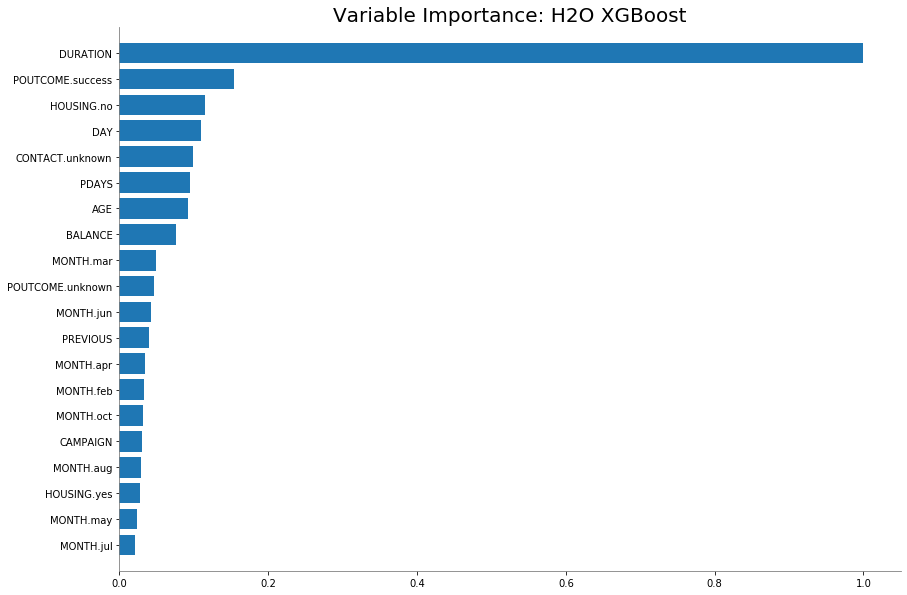

In [34]:
# variable importance plot
model.varimp_plot(num_of_features=20)